In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn import tree, metrics
import matplotlib.pyplot as plt
%matplotlib inline

#### Import 'tennis-time.csv' into a dataframe and examine it.

**The object of this exercise is to use Decision Tree Regression to predict the time spent playing tennis based on weather conditions.**

[tennis-time.csv](https://drive.google.com/file/d/1-qFC0y6j6DZ2ApKX5lwtC8iReKsc0rAs/view?usp=sharing)

In [9]:
play_time = pd.read_csv("data/tennis-time.csv")
play_time.head()

,outlook,temp,humidity,windy,time
0,sunny,hot,high,False,26
1,sunny,hot,high,True,30
2,overcast,hot,high,False,48
3,rainy,mild,high,False,46
4,rainy,cool,normal,False,62


#### Notice that the features (except for play time) are all text labels.  We need to convert them into numeric values. ####

The tool we will use is sci-kit's LabelEncoder (imported above).  The two cells below illustrate the use of LabelEncoder.

Use the LabelEncoder to encode all of the text labels in your dataframe.

In [10]:
LabelEncoder().fit(play_time.outlook).classes_

array(['overcast', 'rainy', 'sunny'], dtype=object)

In [11]:
LabelEncoder().fit_transform(play_time.outlook) #transform into numeric values

array([2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1])

In [13]:
LabelEncoder().fit_transform(play_time.windy) 

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1])

In [14]:
LabelEncoder().fit_transform(play_time.humidity) 

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0])

In [16]:
for col in['outlook','temp','humidity','windy']:
    le = LabelEncoder()
    play_time[col] = le.fit_transform(play_time[col])
play_time

,outlook,temp,humidity,windy,time
0,2,1,0,0,26
1,2,1,0,1,30
2,0,1,0,0,48
3,1,2,0,0,46
4,1,0,1,0,62
5,1,0,1,1,23
6,0,0,1,1,43
7,2,2,0,0,36
8,2,0,1,0,38
9,1,2,1,0,48


#### Split the dataframe into X and y and use a DecisionTreeRegressor to predict the time spent playing tennis based on the available features.

Print out a textual tree.

In [17]:
dt = DecisionTreeRegressor(max_depth=3, min_samples_leaf=2)
X = play_time.drop('time',axis=1)
y=play_time.time
dt.fit(X,y)
#the print() statement outputs a text version of the regression tree
print(export_text(dt,feature_names = X.columns.to_list()))


|--- outlook <= 0.50
|   |--- humidity <= 0.50
|   |   |--- value: [55.00]
|   |--- humidity >  0.50
|   |   |--- value: [43.50]
|--- outlook >  0.50
|   |--- humidity <= 0.50
|   |   |--- temp <= 1.50
|   |   |   |--- value: [28.00]
|   |   |--- temp >  1.50
|   |   |   |--- value: [37.33]
|   |--- humidity >  0.50
|   |   |--- windy <= 0.50
|   |   |   |--- value: [49.33]
|   |   |--- windy >  0.50
|   |   |   |--- value: [35.50]



#### Predict play time if outlook='Sunny', temp='hot', humidity='normal', windy='true'

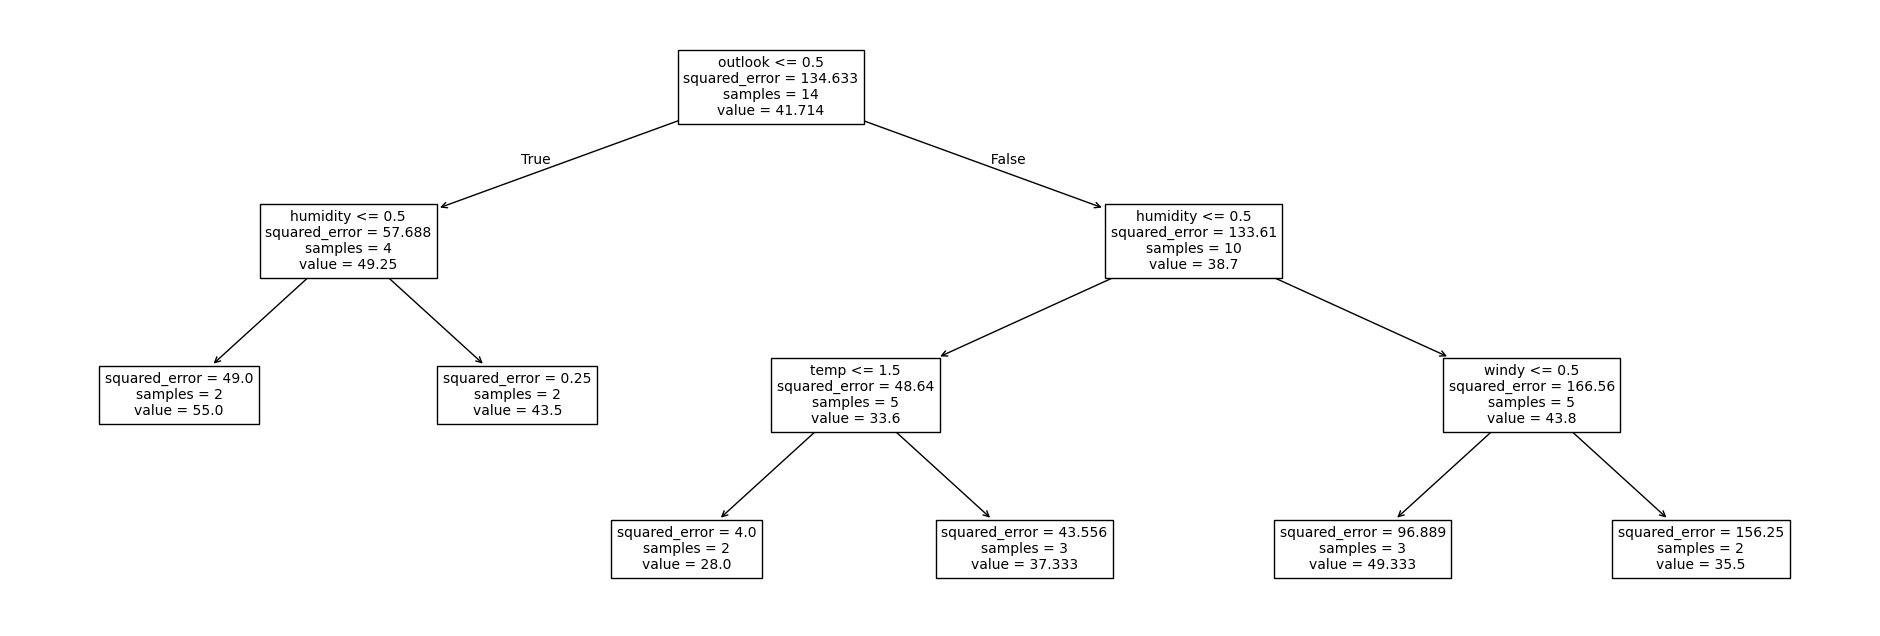

In [20]:
plt.figure(figsize=[24,8])
p=tree.plot_tree(
    dt,
    feature_names = X.columns,
    class_names = y.unique(),
    filled=False,
    fontsize =10,
)

In [22]:
X_test = pd.DataFrame(data=[[2,1,1,1]],columns=['outlook','temp','humidity','windy'])
dt.predict(X_test)

array([35.5])